# Telecoms Customer Churn Prediction

#### Introduction
In the dynamic world of telecommunications, customer churn remains a pressing challenge for companies striving to achieve sustained success. Customers have alot of options and evolving preferences, accurately predicting churn has become important to retain and satisfy them. Customer churn is basically the loss of customers.

In this project, we use Supervised Machine Learning (classification) to explore the significance of churn analytics as a strategic tool for telecommunication companies to proactively identify potential risk factors for churn, optimize retention efforts, and cultivate lasting customer relationships. By leveraging data-driven insights and advanced analytics, companies can gain a competitive edge and ensure sustainable growth in an ever-changing industry.

## 1. Business Understanding
The churn analytics predictive model is a data-driven solution designed to address the persistent challenge of customer churn in subscription-based industries. This model aims to identify customers at risk of churn, enabling businesses to take proactive measures and implement targeted retention strategies.

The primary objective is to reduce customer churn rates and retain valuable customers by providing insights into customer behavior, preferences, and patterns. Utilizing machine learning models such as logistic regression and decision trees, the model evaluates the data to build accurate predictions.

Its performance is assessed through metrics like accuracy, precision, recall and F1-score. Armed with the model's insights, businesses can create personalized offers, marketing campaigns, and proactive customer support initiatives, thus improving customer satisfaction and fostering loyalty.

##### **Hypothesis**

**Null Hypothesis (H0)**: "There is no significant relationship between customer service interactions, engagement with value-added services, and tenure with customer churn in the telecom company."

**Alternative Hypothesis (Ha)**: "There is a significant relationship between customer service interactions, engagement with value-added services, and tenure with customer churn in the telecom company."

##### **Research Questions**

1. How does customer tenure relate to churn rates? Are long-tenured customers more likely to stay with the company, and do new customers exhibit higher churn behavior?

2. Is there a correlation between the total charges and churn rates? Do customers with higher total charges exhibit different churn behavior compared to those with lower total charges?

3. What is the impact of contract type on churn rates? Do customers on long-term contracts have significantly lower churn rates compared to those on short-term contracts?

4. How does the presence of online security influence churn rates? Are customers with online security services less likely to churn compared to those without it?

5. Are there significant differences in churn behavior between customers who have device protection and those who don't?

6. What is the relationship between the availability of tech support and churn rates? Are customers with access to tech support more likely to remain with the company?

7. Do streaming services play a role in customer churn? Are customers with streaming services, such as StreamingTV and StreamingMovies, more likely to stay with the company?

8. How does the choice of payment method impact churn rates? Are customers with specific payment methods more prone to churn than others?

## Data Understanding
Packages for accessing remote database with data and other necessary data handling packages/libraries

In [1]:
%pip install pyodbc
%pip install python-dotenv 
%pip install openpyxl
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\OLUSEYE\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\OLUSEYE\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\OLUSEYE\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\OLUSEYE\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\OLUSEYE\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [2]:
# Database connections

import pyodbc 
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import warnings 
warnings.filterwarnings('ignore')

# Data handling
import pandas as pd
import openpyxl
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
from plotly.subplots import make_subplots


# EDA (pandas-profiling, etc. )
...

# Feature Processing (Scikit-learn processing, etc. )
import sklearn

from sklearn.impute import SimpleImputer

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os, pickle


## Data Loading
### Accessing first dataset from the database
The first 3000 records of the dataset can be found in a remote database.

-   **pyodbc**: A package for creating connection strings to your remote database
-   **python-dotenv**: A package for creating environment variables that will help you hide sensitve configuration informantion such as database credentials and API keys

The second dataset (2000 records) is already available as a .xlsx file. **This is the test dataset**

The third dataset is already available as a .csv file.

In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [5]:
# Get the cursor
cursor = connection.cursor()

# Retrieve the table names
table_names = cursor.tables(tableType='TABLE')

# Fetch all the table names
tables = table_names.fetchall()

# Print the table names
for table in tables:
    print(table.table_name)

LP2_Telco_churn_first_3000
trace_xe_action_map
trace_xe_event_map


In [6]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert,delete or update this database table. 

query = "SELECT * FROM LP2_Telco_churn_first_3000"
data=pd.read_sql(query,connection)

In [7]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [9]:
# save to csv

data.to_csv('LP2_Telco_churn_first_3000.csv', index=False)

In [12]:
# Load Telco second 2000 data with openpyxl
data_xls = pd.read_excel('Telco-churn-second-2000.xlsx')
data_xls.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [13]:
#This is the test dataset to be used later
data_xls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [14]:
# save to csv

data_xls.to_csv ("Telco-churn-second-2000.csv", 
                  index = None,
                  header=True)

In [17]:
# load and view last dataset

data2 = pd.read_csv('LP2_Telco-churn-last-2000.csv')
data2.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No
5,2359-QWQUL,Female,0,Yes,No,39,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),104.70,4134.85,Yes
6,9103-TCIHJ,Female,0,No,No,15,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,55.70,899.8,Yes
7,7407-SUJIZ,Male,0,No,No,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.60,541.5,No
8,9150-KPBJQ,Female,0,No,No,6,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.65,116.85,No
9,0052-DCKON,Male,0,Yes,No,66,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),115.80,7942.15,No


In [18]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [19]:
(data.shape,data_xls.shape,data2.shape)

((3000, 21), (2000, 20), (2043, 21))

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

Data Cleaning

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [21]:
#check for duplicates in the three datasets and drop them if there are any
data.duplicated().sum()

0

In [22]:
data_xls.duplicated().sum()

0

In [23]:
data2.duplicated().sum()

0

In [24]:
#Drop the CustomerID colum as we wont need it for analysis
data.drop(columns='customerID',inplace=True)

In [25]:
#Change seniorCitizen datatype from bool to int64
#(0 for false and 1 for True)
data['SeniorCitizen']=data['SeniorCitizen'].astype('int64')

In [26]:
#convert the columns that are not supposed to be bool to obj type
bool_to_obj={'Partner':object,
             'Dependents':object,
             'PhoneService':object,
             'PaperlessBilling':object}
data=data.astype(bool_to_obj)

In [27]:
#Replace True and False values 
replace_values={True:'Yes', False: 'No'}

#Use replace() method

data['Partner']=data['Partner'].replace(replace_values)
data['Dependents']=data['Dependents'].replace(replace_values)
data['PhoneService']=data['PhoneService'].replace(replace_values)
data['MultipleLines']=data['MultipleLines'].replace(replace_values)
data['OnlineSecurity']=data['OnlineSecurity'].replace(replace_values)
data['OnlineBackup']=data['OnlineBackup'].replace(replace_values)
data['DeviceProtection']=data['DeviceProtection'].replace(replace_values)
data['TechSupport']=data['TechSupport'].replace(replace_values)
data['StreamingTV']=data['StreamingTV'].replace(replace_values)
data['StreamingMovies']=data['StreamingMovies'].replace(replace_values)
data['PaperlessBilling']=data['PaperlessBilling'].replace(replace_values)
data['Churn']=data['Churn'].replace(replace_values)


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            3000 non-null   object 
 1   SeniorCitizen     3000 non-null   int64  
 2   Partner           3000 non-null   object 
 3   Dependents        3000 non-null   object 
 4   tenure            3000 non-null   int64  
 5   PhoneService      3000 non-null   object 
 6   MultipleLines     2731 non-null   object 
 7   InternetService   3000 non-null   object 
 8   OnlineSecurity    2349 non-null   object 
 9   OnlineBackup      2349 non-null   object 
 10  DeviceProtection  2349 non-null   object 
 11  TechSupport       2349 non-null   object 
 12  StreamingTV       2349 non-null   object 
 13  StreamingMovies   2349 non-null   object 
 14  Contract          3000 non-null   object 
 15  PaperlessBilling  3000 non-null   object 
 16  PaymentMethod     3000 non-null   object 


In [29]:
#Check for missing data in the columns
data.isnull().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [30]:
#Since Churn column has just 1 missing value, we drop the value
data.dropna(subset='Churn',inplace=True)

In [31]:
data.isnull().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 0
dtype: int64

In [32]:
#View the missing values in TotalCharges Column
data[np.isnan(data['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,None,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,None,None,None,None,None,None,Two year,No,Mailed check,20.250000,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,None,None,None,None,None,None,Two year,No,Mailed check,25.750000,NaN,No
1340,Female,0,Yes,Yes,0,No,None,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.049999,NaN,No


The missing values in **TotalCharges have a tenure of 0, even though there are values in the monthlycharges column. We can drop the rows

In [33]:
#Drop rows where tenure =0
data.drop(labels=data[data['tenure']==0].index,axis=0,inplace=True)

In [34]:
#Since the remaining missing values are categorical, we replace them with the mode of the values
columns_to_replace = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
           'DeviceProtection', 'TechSupport', 'StreamingTV',
           'StreamingMovies']

for column in columns_to_replace:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [35]:
#we preview the dataset to see if all are intact
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2994 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2994 non-null   object 
 1   SeniorCitizen     2994 non-null   int64  
 2   Partner           2994 non-null   object 
 3   Dependents        2994 non-null   object 
 4   tenure            2994 non-null   int64  
 5   PhoneService      2994 non-null   object 
 6   MultipleLines     2994 non-null   object 
 7   InternetService   2994 non-null   object 
 8   OnlineSecurity    2994 non-null   object 
 9   OnlineBackup      2994 non-null   object 
 10  DeviceProtection  2994 non-null   object 
 11  TechSupport       2994 non-null   object 
 12  StreamingTV       2994 non-null   object 
 13  StreamingMovies   2994 non-null   object 
 14  Contract          2994 non-null   object 
 15  PaperlessBilling  2994 non-null   object 
 16  PaymentMethod     2994 non-null   object 
 17  

In [36]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [37]:
#Drop CustomerID column
data2.drop(columns='customerID',inplace=True)

In [38]:
#Change Dtype of TotalCharges column from object to numeric
data2['TotalCharges'] = pd.to_numeric(data2['TotalCharges'],errors='coerce')

In [39]:
#Preview the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2994 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2994 non-null   object 
 1   SeniorCitizen     2994 non-null   int64  
 2   Partner           2994 non-null   object 
 3   Dependents        2994 non-null   object 
 4   tenure            2994 non-null   int64  
 5   PhoneService      2994 non-null   object 
 6   MultipleLines     2994 non-null   object 
 7   InternetService   2994 non-null   object 
 8   OnlineSecurity    2994 non-null   object 
 9   OnlineBackup      2994 non-null   object 
 10  DeviceProtection  2994 non-null   object 
 11  TechSupport       2994 non-null   object 
 12  StreamingTV       2994 non-null   object 
 13  StreamingMovies   2994 non-null   object 
 14  Contract          2994 non-null   object 
 15  PaperlessBilling  2994 non-null   object 
 16  PaymentMethod     2994 non-null   object 
 17  

In [40]:
#View missing values in Total Charges of data2
data2[np.isnan((data2['TotalCharges']))]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
1670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No
1754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No


In [41]:
#Drop rows where tenure =0
data2.drop(labels=data2[data2['tenure']==0].index,axis=0,inplace=True)

In [42]:
#Merge the test dataset
test=pd.concat([data, data2],ignore_index=True)

In [43]:
test.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5034.000000,5034.000000,5034.000000,5034.000000
mean,0.162694,32.620580,65.107251,2300.954758
std,0.369123,24.511015,30.068019,2268.346402
min,0.000000,1.000000,18.400000,18.799999
25%,0.000000,9.000000,35.799999,417.662498
50%,0.000000,29.000000,70.599998,1401.000000
75%,0.000000,56.000000,90.050003,3860.599976
max,1.000000,72.000000,118.650002,8670.100000


tenure


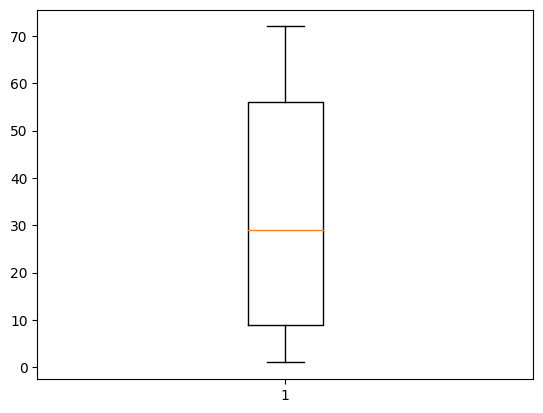

MonthlyCharges


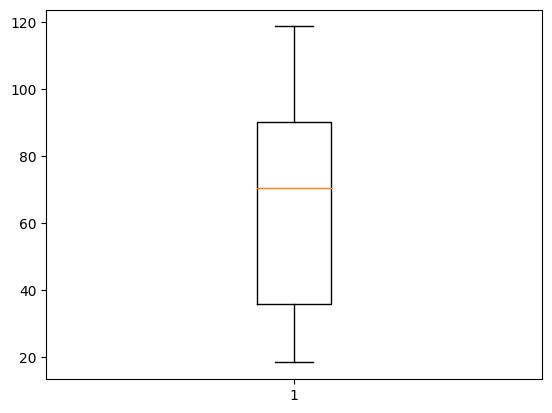

TotalCharges


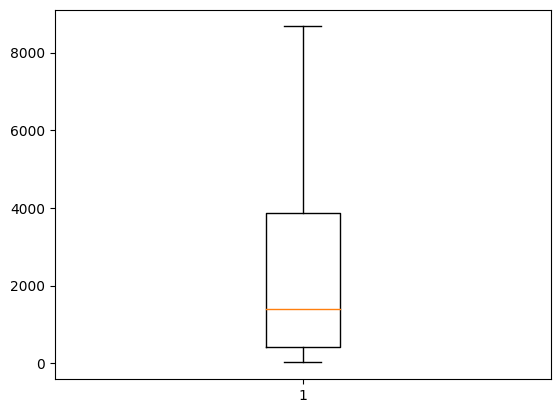

In [44]:
#Check for outliers in the numerical variables
for col in ['tenure','MonthlyCharges','TotalCharges']:
    print(col)
    plt.boxplot(test[col])
    plt.show()

Split Data Into Train and Test Sets

## Univariate Analysis
Here is the section to explore, analyze, visualize each variable independently of the others.

First we look at the churn rates in the dataset

churn_data=['Yes','No']  #.value_counts()
counts=churn_data.value_counts()

colors=['lightblue', 'lightskyblue']

#create a pie chart using seaborn countplot
plt.figure(figsize=(8,8))
sns.countplot(x='Churn', data={'Churn': churn_data}, palette=colors)
#plt.pie(labels=churn_data.index,colors=colors,autopct='%1.1f%%',startangle=90)

#Draw a white circle at the center of the doughnut effect
center_circle=plt.Circle((0,0), 0.7, fc='white')
fig=plt.gcf()
fig.gca().add_artist(center_circle)

#set the aspect ratio to be equal so that the pie will be circular
plt.axis('equal')
plt.title('Churn rate among customers')
plt.show()


In [45]:
#churn_data=test['Churn'].value_counts()
#print(churn_data)

In [46]:
#str(1336/5034*100)+'%'


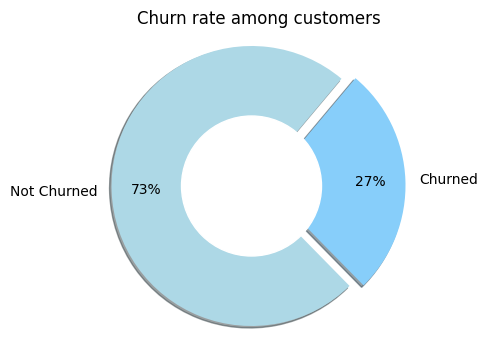

In [68]:
churn_data = test['Churn'].value_counts()

# Create a pie chart using Seaborn
plt.figure(figsize=(4, 4))

plt.pie(churn_data, labels=['Not Churned','Churned'], colors=['LightBlue','LightSkyBlue'], startangle=50, shadow=True, radius=2,
     explode=(0,0.2),autopct='%1.0f%%', pctdistance=0.75 ,  )
Circle=plt.Circle((0,0), 1, color='white')
c= plt.gcf()

c.gca().add_artist(Circle)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.title('Churn rate among customers')
plt.show()

1. How does customer tenure relate to churn rates? Are long-tenured customers more likely to stay with the company, and do new customers exhibit higher churn behavior?

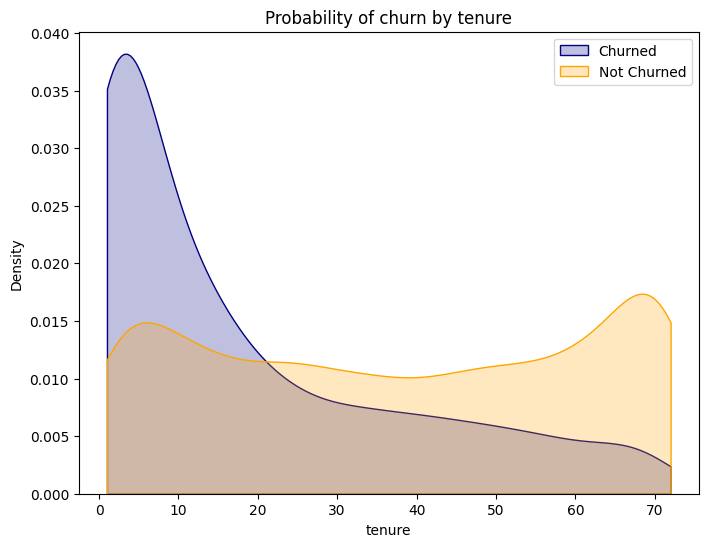

In [69]:
#we use a probability density distribution to show distribution of churn related to tenure

def kdeplot(x):
    plt.figure(figsize=(8,6))
    plt.title('Probability of churn by tenure')
    ax0=sns.kdeplot(test[test['Churn']=='Yes'][x], color='navy', label='Churn:Yes', fill=True, cut =0)
    ax1=sns.kdeplot(test[test['Churn']=='No'][x], color='orange',label='Churn:No',fill=True,cut=0)
    plt.legend(['Churned','Not Churned'], loc='upper right')
kdeplot('tenure')

**.** Customers with a lower tenure (recent customers) are more likely to churn.<br>
**.** Customers on a longer tenure are less likely to churn.

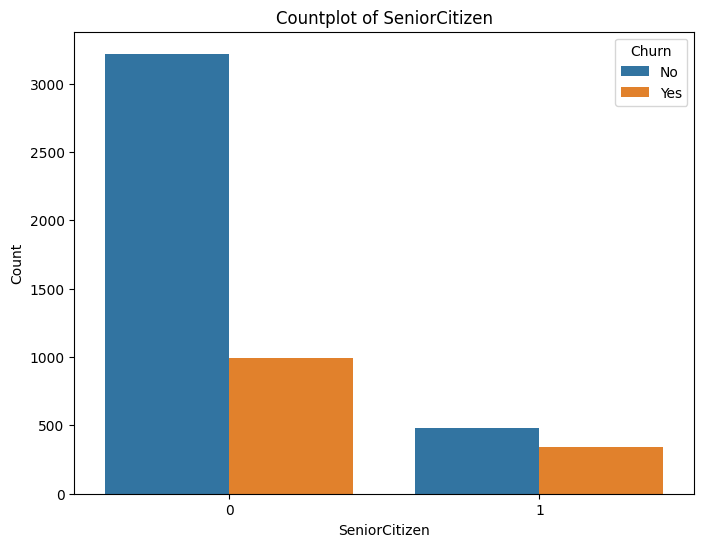

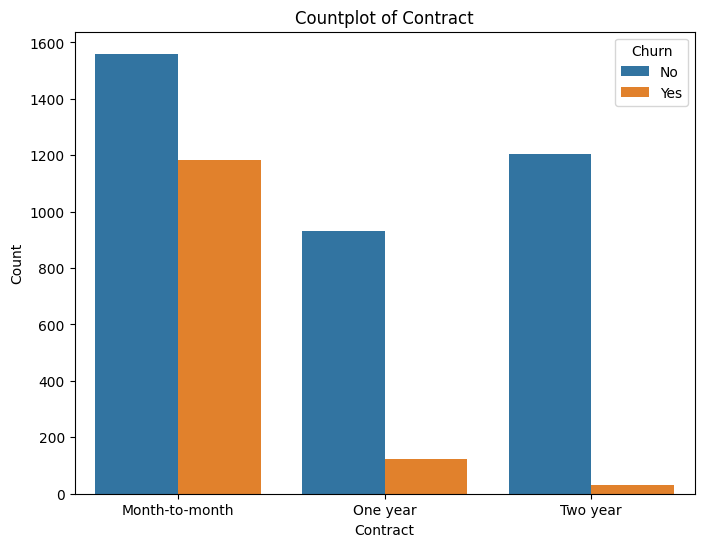

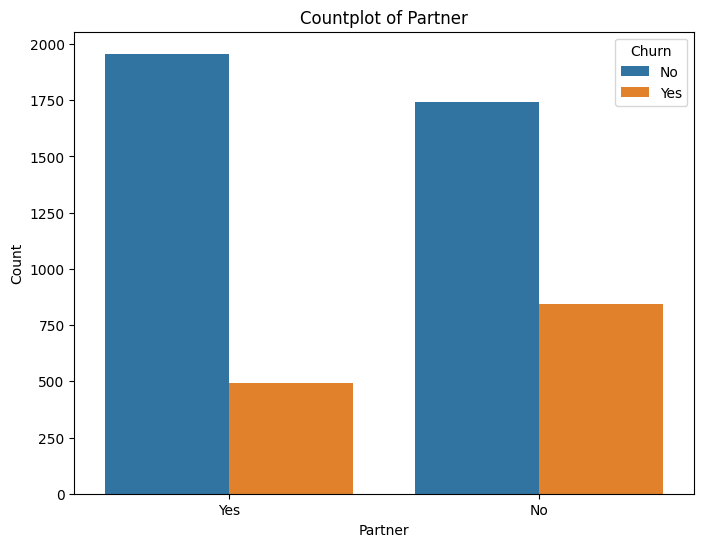

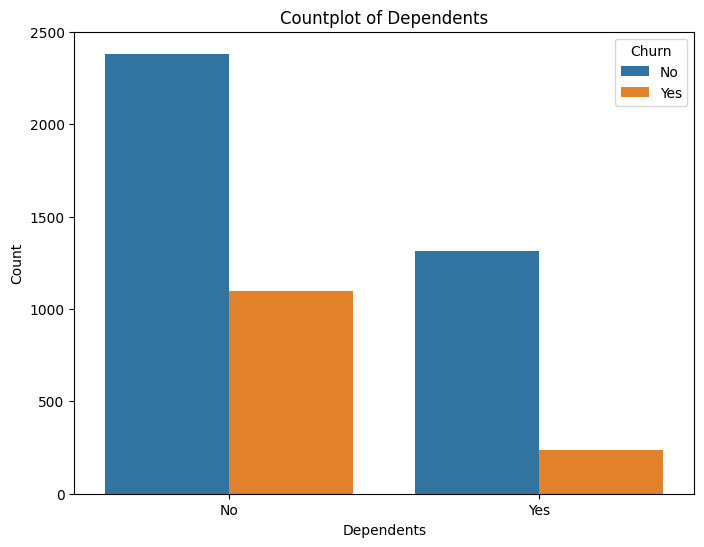

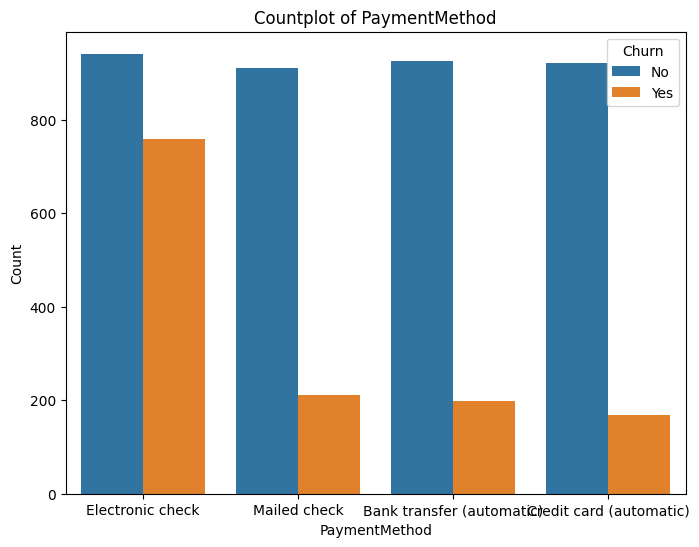

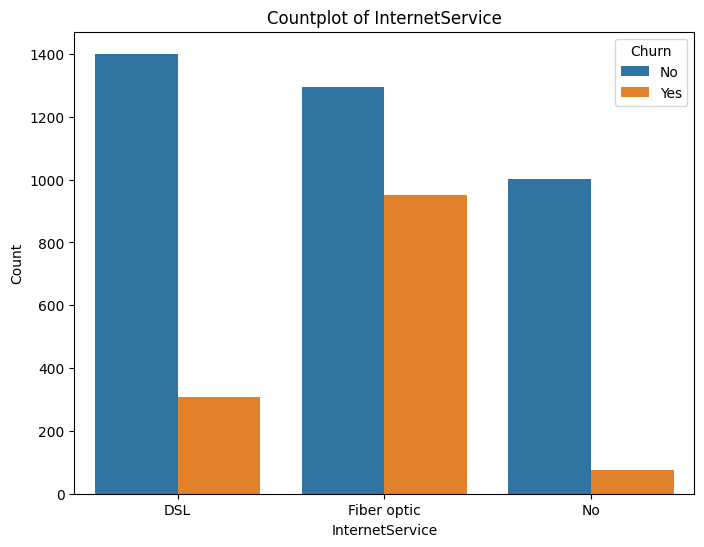

In [105]:

# Columns to generate countplots
columns_to_plot = ['SeniorCitizen', 'Contract', 'Partner', 'Dependents', 'PaymentMethod', 'InternetService']

# Function to generate countplots for specified features
def generate_countplots(features, test):
    for feature in features:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=feature, hue='Churn', data=test)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.title(f'Countplot of {feature}')
        plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])  # Add the legend
        plt.show()

# Call the function to generate countplots for the specified columns
generate_countplots(columns_to_plot, test)




**.** Senior citizens churn rate is lower than non-senior churn rate.

**.** Churn rate for month-to-month contracts much higher that for other contract durations.

**.** Moderately higher churn rate for customers without partners.

**.** Much higher churn rate for customers without children.

**.** Payment method electronic check shows much higher churn rate than other payment methods.

**.** Customers with InternetService fiber optic as part of their contract have much higher churn rate.

## Bivariate & Multivariate Analysis
Here is the section to explore, analyze, visualize each variable in relation to the others.

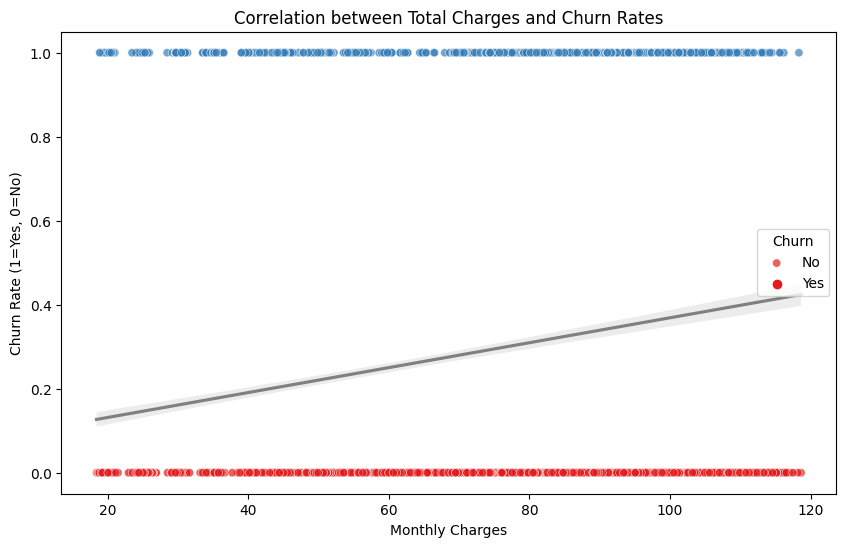

In [112]:
#We look at the correlation between total charges and churn rate

# Function to map churn rates to numeric values for plotting

def map_churn(churn):
    return 1 if churn == 'Yes' else 0

# Map churn rates to numeric values (1 for Yes, 0 for No)
test['Churn_numeric'] = test['Churn'].apply(map_churn)

# Create the scatter plot with a trend line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=test, x='MonthlyCharges', y='Churn_numeric', hue='Churn', palette='Set1', alpha=0.7)
sns.regplot(data=test, x='MonthlyCharges', y='Churn_numeric', scatter=False, color='gray')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Rate (1=Yes, 0=No)')
plt.title('Correlation between Total Charges and Churn Rates')
plt.legend(title='Churn', loc='center right', labels=['No', 'Yes'])
plt.show()

Total Charges Increases as Monthly Charges Increases

# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

## Drop Duplicates

In [50]:
# Use pandas.DataFrame.drop_duplicates method

## Dataset Splitting

In [51]:
# Use train_test_split with a random_state, and add stratify for Classification

## Impute Missing Values

In [52]:
# Use sklearn.impute.SimpleImputer

## New Features Creation

In [53]:
# Code here

## Features Encoding

In [54]:
# From sklearn.preprocessing use OneHotEncoder to encode the categorical features.

## Features Scaling

In [55]:
# From sklearn.preprocessing use StandardScaler, MinMaxScaler, etc.

## Optional: Train set Balancing (for Classification only)

In [56]:
# Use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Simple Model #001

Please, keep the following structure to try all the model you want.

### Create the Model

In [57]:
# Code here

### Train the Model

In [58]:
# Use the .fit method

### Evaluate the Model on the Evaluation dataset (Evalset)

In [59]:
# Compute the valid metrics for the use case # Optional: show the classification report 

### Predict on a unknown dataset (Testset)

In [60]:
# Use .predict method # .predict_proba is available just for classification

## Simple Model #002

### Create the Model

In [61]:
# Code here

### Train the Model

In [62]:
# Use the .fit method

### Evaluate the Model on the Evaluation dataset (Evalset)

In [63]:
# Compute the valid metrics for the use case # Optional: show the classification report 

### Predict on a unknown dataset (Testset)

In [64]:
# Use .predict method # .predict_proba is available just for classification

## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

In [65]:
# Code here

## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

In [66]:
# Code here

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [67]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app